## Preprocessing data

#### Creating dummy variables
Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

The music_df dataset has been preloaded for you, and its shape is printed. Also, pandas has been imported as pd.

Now you will create a new DataFrame containing the original columns of music_df plus dummy variables from the "genre" column.

In [126]:
import pandas as pd
import random

music_df = pd.read_csv("music_clean.csv")

#datasette genre sadece 0 ve 1 lerden olustugu icin datacamptaki genreleri buraya alıp random atama yaptık.
music_df['genre'] = pd.Series(
    random.choices(['Blues', 'Rock', 'Classical', 'Anime', 'Alternative', 'Electronic', 'Country', 'Hip-Hop', 'Jazz', 'Rap'], weights=None, k=len(music_df)), 
    index=music_df.index)
    

# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first = True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))
print(music_df.columns)
music_dummies

Shape of music_dummies: (1000, 20)
Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre'],
      dtype='object')


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_Anime,genre_Blues,genre_Classical,genre_Country,genre_Electronic,genre_Hip-Hop,genre_Jazz,genre_Rap,genre_Rock
36506,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,0,0,1,0,0,0,0,0,0
37591,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,0,0,0,0,0,0,0,0,1
37658,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,0,1,0,0,0,0,0,0,0
36060,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,1,0,0,0,0,0,0,0,0
35710,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44501,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0,0,1,0,0,0,0,0,0
25114,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0,0,0,0,0,0,0,1,0
46896,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0,1,0,0,0,0,0,0,0
45135,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0,0,1,0,0,0,0,0,0


As there were ten values in the "genre" column, nine new columns were added by a call of pd.get_dummies() using drop_first=True. After dropping the original "genre" column, there are still eight new columns in the DataFrame!

#### Regression with categorical features
Now you have created music_dummies, containing binary features for each song's genre, it's time to build a ridge regression model to predict song popularity.

music_dummies has been preloaded for you, along with Ridge, cross_val_score, numpy as np, and a KFold object stored as kf.

The model will be evaluated by calculating the average RMSE, but first, you will need to convert the scores for each fold to positive values and take their square root. This metric shows the average error of our model's predictions, so it can be compared against the standard deviation of the target value—"popularity".

In [127]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

kf = KFold(n_splits = 5, shuffle = True, random_state=42)

# Create X and y
X = music_dummies.drop("popularity", axis = 1).values
y = music_dummies["popularity"].values

# Instantiate a ridge model
ridge = Ridge(alpha = 0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 12.583721898962715
Standard Deviation of the target array: 14.02156909907019


Great work! An average RMSE of approximately 12.53 is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.

## Handling missing data

#### Dropping missing data
Over the next three exercises, you are going to tidy the music_df dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "Rock" genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.

In [128]:
# Print missing values for each column
print(music_df.isna().sum())

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


In [129]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Shape of the `music_df`: (1000, 12)


Well done! The dataset has gone from 1000 observations down to 892, but it is now in the correct format for binary classification and the remaining missing values can be imputed as part of a pipeline. (Bizim datasette zaten NaN olmadığı için 1000 olarak kaldı ama datacamptakinde NaN vardı.)

In [130]:
# Import modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors = 3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

Perfect pipeline skills! You are now ready to build and evaluate a song genre classification model.

#### Pipeline for song genre prediction: II
Having set up the steps of the pipeline in the previous exercise, you will now use it on the music_df dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

X_train, X_test, y_train, and y_test have been preloaded for you, and confusion_matrix has been imported from sklearn.metrics.

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = music_df.drop("genre", axis = 1).values
y = music_df["genre"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[266   3]
 [ 29   2]]


Excellent! See how easy it is to scale our model building workflow using pipelines. In this case, the confusion matrix highlights that the model had 265 true positives and 1 true negatives!

## Centering and scaling

#### Centering and scaling for regression
Now you have seen the benefits of scaling your data, you will use a pipeline to preprocess the music_df features and build a lasso regression model to predict a song's loudness.

X_train, X_test, y_train, and y_test have been created from the music_df dataset, where the target is "loudness" and the features are all other columns in the dataset. Lasso and Pipeline have also been imported for you.

Note that "genre" has been converted to a binary feature where 1 indicates a rock song, and 0 represents other genres.

In [132]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = music_df.drop("loudness", axis = 1).values
y = music_df["loudness"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.7185052288252617


Awesome scaling! The model may have only produced an R-squared of 0.718, but without scaling this exact model would have only produced a score of 0.35, which proves just how powerful scaling can be!

#### Centering and scaling for classification
Now you will bring together scaling and model building into a pipeline for cross-validation.

Your task is to build a pipeline to scale features in the music_df dataset and perform grid search cross-validation using a logistic regression model with different values for the hyperparameter C. The target variable here is "genre", which contains binary values for rock as 1 and any other genre as 0.

StandardScaler, LogisticRegression, and GridSearchCV have all been imported for you.

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X = music_df.drop("genre", axis = 1).values
y = music_df["genre"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]

pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.9 
 {'logreg__C': 0.001}


Well done! Using a pipeline shows that a logistic regression model with "C" set to 0.001 produces a model with 0.91 accuracy!

## Evaluating multiple models
#### Visualizing regression model performance
Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's "energy" levels.

The music_df dataset has had dummy variables for "genre" added. Also, feature and target arrays have been created, and these have been split into X_train, X_test, y_train, and y_test.

The following have been imported for you: LinearRegression, Ridge, Lasso, cross_val_score, and KFold.

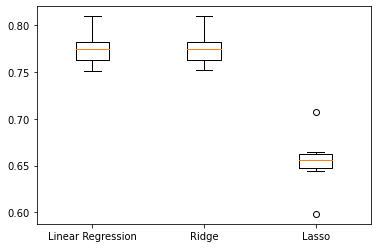

In [134]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression

X = music_df.drop("energy", axis = 1).values
y = music_df["energy"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

Nicely done! Lasso regression is not a good model for this problem, while linear regression and ridge perform fairly equally. Let's make predictions on the test set, and see if the RMSE can guide us on model selection.

#### Predicting on the test set
In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

You will use root mean squared error (RMSE) as the metric. The dictionary models, containing the names and instances of the two models, has been preloaded for you along with the training and target arrays X_train_scaled, X_test_scaled, y_train, and y_test.

In [135]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = music_df.drop("energy", axis = 1).values
y = music_df["energy"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1)}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.11064650358738104
Ridge Test Set RMSE: 0.11064903843065729


The linear regression model just edges the best performance, although the difference is a RMSE of 0.00001 for popularity! Now let's look at classification model selection.

#### Visualizing classification model performance
In this exercise, you will be solving a classification problem where the "popularity" column in the music_df dataset has been converted to binary values, with 1 representing popularity more than or equal to the median for the "popularity" column, and 0 indicating popularity below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

The data has been split, scaled, and preloaded for you as X_train_scaled, X_test_scaled, y_train, and y_test. Additionally, KNeighborsClassifier, DecisionTreeClassifier, and LogisticRegression have been imported.

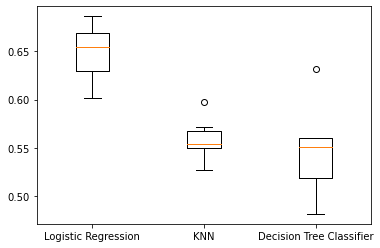

In [136]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np

music_df["popularity"] = np.where(music_df["popularity"]  >= np.median(music_df["popularity"]), 1, 0)

X = music_df.drop("popularity", axis = 1).values
y = music_df["popularity"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

Looks like logistic regression is the best candidate based on the cross-validation results! Let's wrap up by building a pipeline

#### Pipeline for predicting song popularity
For the final exercise, you will build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model. The aim is to find the best parameters and accuracy when predicting song genre!

All the models and objects required to build the pipeline have been preloaded for you.

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.112, 'logreg__solver': 'newton-cg'}, Accuracy: 0.59


Excellent - you've selected a model, built a preprocessing pipeline, and performed hyperparameter tuning to create a model that is 82% accurate in predicting song genres!